In [1]:
import sys
sys.path.append("../")
from pathlib import Path

import numpy as np
from matplotlib.axes import Axes
from matplotlib.figure import Figure

from const import gnps

DIR = Path("/data1/xp/code/specEmbedding/score_distribution")
TANIMOTO = "tanimoto"
PAIR = "pair"

SAVE_DIR = Path("./score_distribution")
SAVE_DIR.mkdir(exist_ok=True, parents=True)

methods = ["SpecEmbedding", "MSBERT", "DreaMS", "Spec2Vec", "MS2DeepScore"]

In [2]:
def get_labels(
    unique_smiles,
    smiles_seq
):
    labels = []
    for smiles in smiles_seq:
        labels.append(np.where(unique_smiles == smiles)[0][0])
    return np.array(labels)

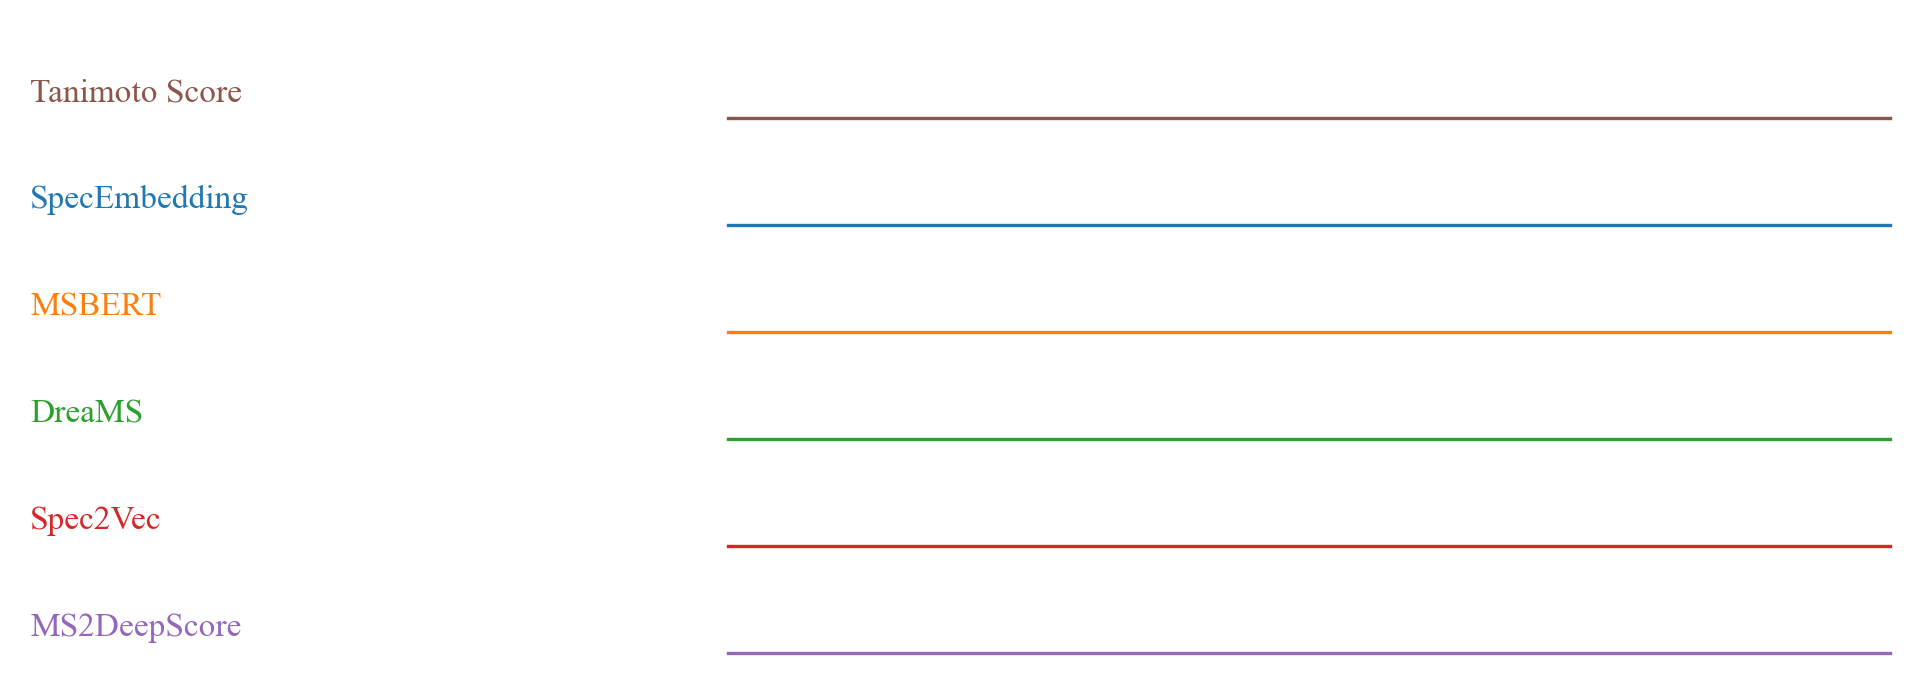

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
sns.set_palette("tab10")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

colors = sns.color_palette("tab10")
colors = [colors[len(methods)]] + colors[:len(methods)]

figure, axs = plt.subplots(len(methods) + 1, 1, figsize=(5, 2.7), dpi=300, sharex=True, sharey=True)
axs: list[Axes]
figure: Figure
for i, ax in enumerate(axs):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_color(colors[i])
    ax.patch.set_alpha(0)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.tick_params(axis='both', which='both', length=0)

axs[0].text(-0.6, 0.2, "Tanimoto Score", fontsize=8, color=colors[0])
for i, (method, ax) in enumerate(zip(methods, axs[1:]), 1):
    ax.text(-0.6, 0.2, method, fontsize=8, color=colors[i])

In [4]:
tanimoto_scores = np.load(gnps.DIR / gnps.TANOMOTO_SCORE, mmap_mode="r+", allow_pickle=True)
query = np.load(gnps.ORBITRAP_TEST_QUERY, allow_pickle=True)
smiles_seq = [
    s.get("smiles")
    for s in query
]
unique_smiles = np.load(gnps.DIR / gnps.UNIQUE_SMILES, allow_pickle=True)
labels = get_labels(unique_smiles, smiles_seq)

tanimoto_score = tanimoto_scores[labels][:, labels]
mask = np.diag(np.ones((tanimoto_score.shape[0]))).astype(bool)
mask = ~mask
tanimoto_score = tanimoto_score[mask]

In [5]:
data = [tanimoto_score]
for method in methods:
    score = np.load(DIR / TANIMOTO / f"{method}.npy", allow_pickle=True)
    data.append(score)

for i, item in enumerate(data):
    sns.kdeplot(item, color=colors[i], ax=axs[i], fill=True)

In [6]:
axs[-1].set_xticks(np.linspace(-0.6, 1.0, 9, endpoint=True))
axs[-1].set_xticklabels(axs[-1].get_xticklabels(), fontsize=8)
axs[-1].set_xlabel("Score")

for i in range(len(axs) - 1):
    pos1 = axs[i].get_position()
    pos2 = axs[i + 1].get_position()
    axs[i + 1].set_position([pos2.x0, pos1.y0 - 0.03, pos2.width, pos2.height])

figure.subplots_adjust(hspace=-0.8)

In [7]:
from matplotlib.patches import Rectangle

labels = ["Tanimoto Score"] + methods
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(labels))]

figure.legend(
    labels=labels, 
    handles=handles, 
    loc="lower left", 
    bbox_to_anchor=(1.02, 0.2), 
    ncol=1, 
    frameon=False, 
    fontsize=8
)

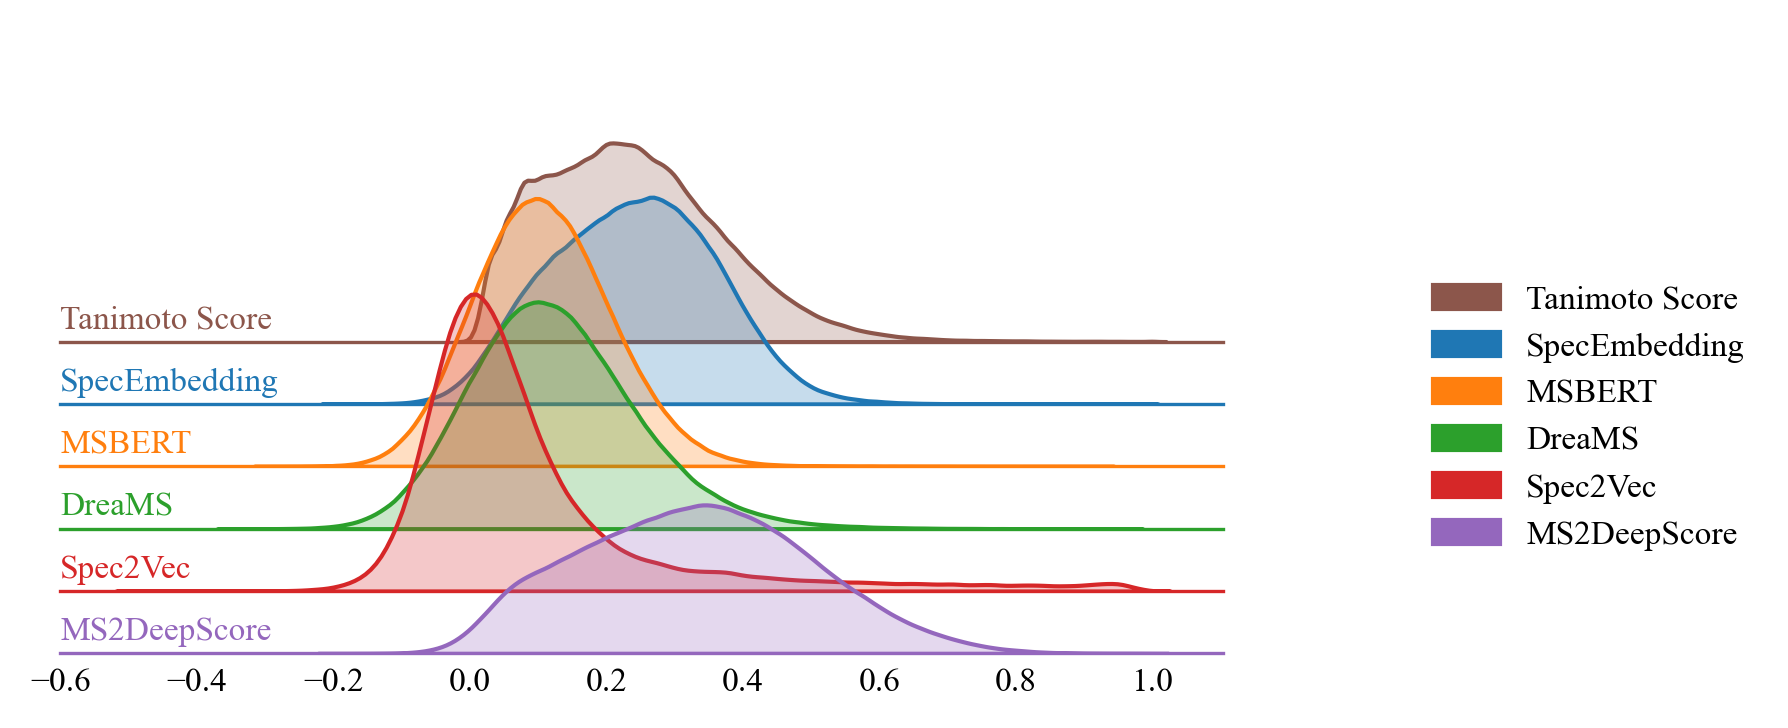

In [8]:
figure

In [9]:
figure.savefig(SAVE_DIR / "score_distribution.pdf", transparent=True, bbox_inches="tight")
figure.savefig(SAVE_DIR / "score_distribution.png", transparent=True, bbox_inches="tight")
figure.savefig(SAVE_DIR / "score_distribution.svg", transparent=True, bbox_inches="tight")

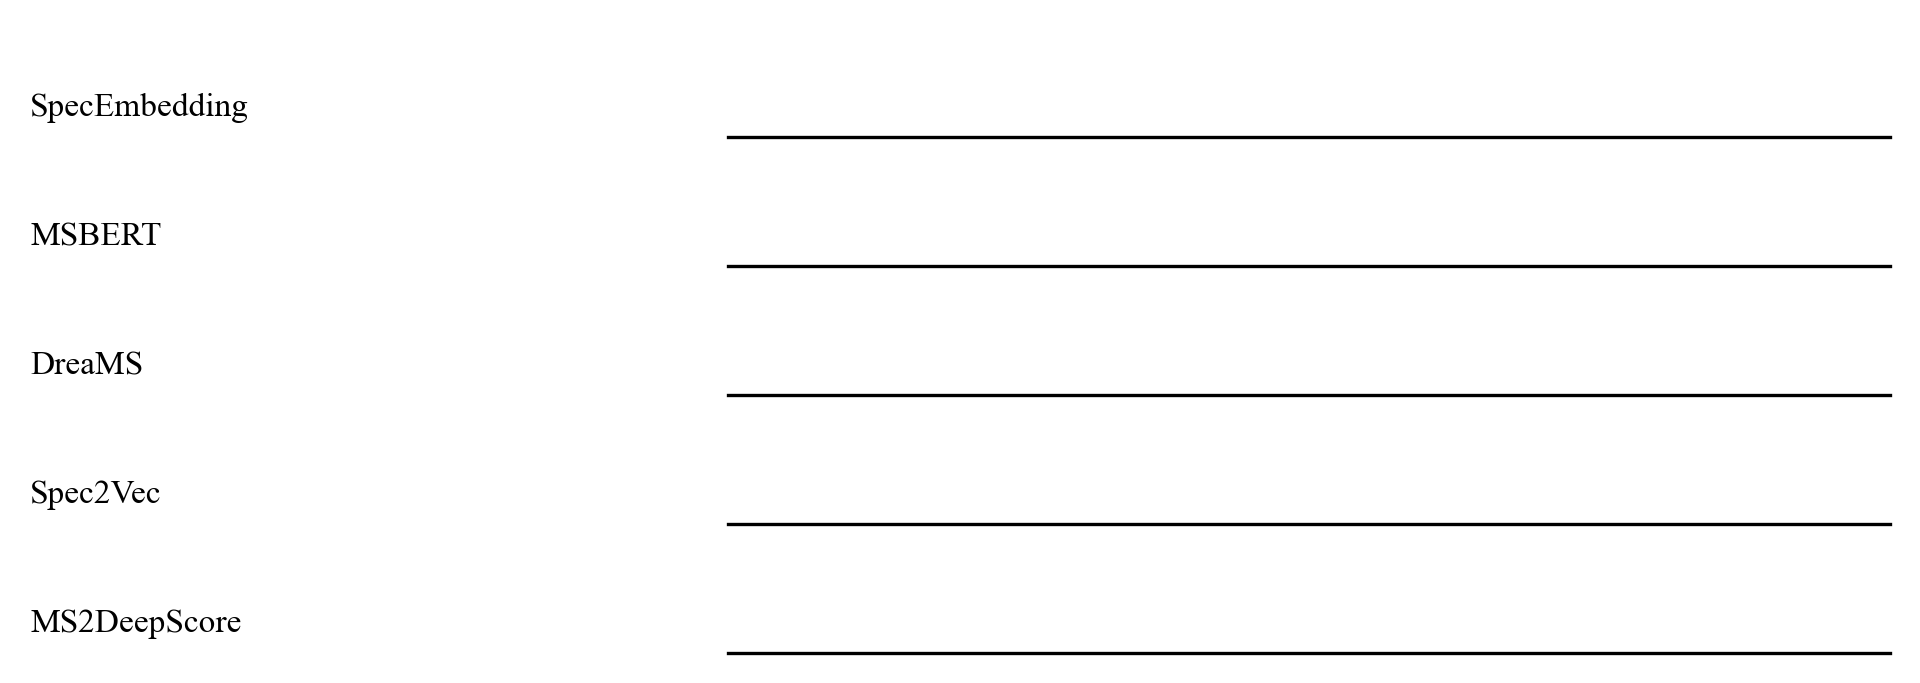

In [10]:
colors = sns.color_palette("tab10")

figure, axs = plt.subplots(len(methods), 1, figsize=(5, 2.7), dpi=300, sharex=True, sharey=True)
axs: list[Axes]
figure: Figure
for i, ax in enumerate(axs):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.patch.set_alpha(0)
    ax.tick_params(axis='both', which='both', length=0)

for method, ax in zip(methods, axs):
    ax.text(-0.6, 0.2, method, fontsize=8)

In [11]:
import seaborn as sns

for i, method in enumerate(methods):
    data = np.load(DIR / PAIR / f"{method}.npy", allow_pickle=True).item()
    sns.kdeplot(data["positive"], fill=True, color=colors[0], ax=axs[i])
    sns.kdeplot(data["negative"], fill=True, color=colors[1], ax=axs[i])

In [12]:
axs[-1].get_xticklabels()

[]

In [13]:
axs[-1].set_xticks(np.linspace(-0.6, 1.0, 9, endpoint=True))
axs[-1].set_xticklabels(axs[-1].get_xticklabels(), fontsize=8)
axs[-1].set_xlabel("Score")

for i in range(len(axs) - 1):
    pos1 = axs[i].get_position()
    pos2 = axs[i + 1].get_position()
    axs[i + 1].set_position([pos2.x0, pos1.y0 - 0.03, pos2.width, pos2.height])

figure.subplots_adjust(hspace=-0.8)

In [14]:
from matplotlib.patches import Rectangle

labels = ["Positive", "Negative"]
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(labels))]

figure.legend(
    labels=labels, 
    handles=handles, 
    loc="upper center",
    bbox_to_anchor=(0.5, 0.9),
    ncol=2,
    frameon=False,
    fontsize=8
)

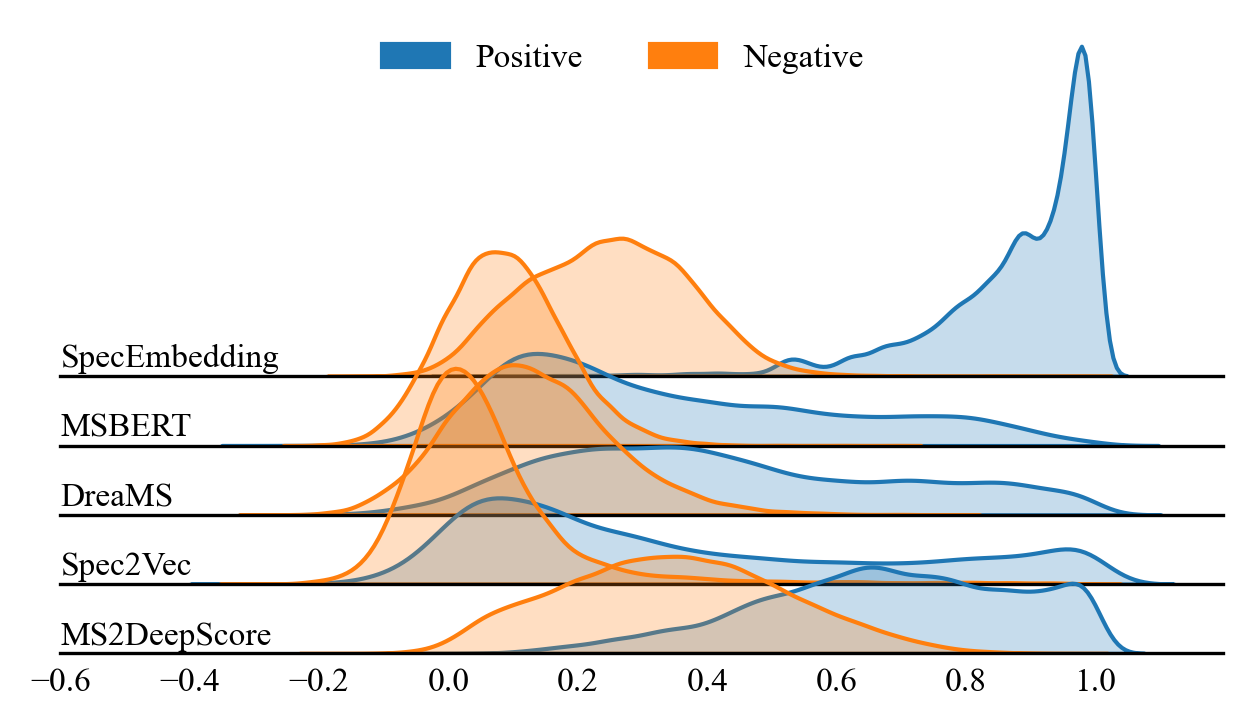

In [15]:
figure

In [16]:
figure.savefig(SAVE_DIR / "positive_negative_pair.pdf", bbox_inches="tight", transparent=True)
figure.savefig(SAVE_DIR / "positive_negative_pair.png", bbox_inches="tight", transparent=True)
figure.savefig(SAVE_DIR / "positive_negative_pair.svg", bbox_inches="tight", transparent=True)

In [19]:
pred_scores = np.load(DIR / TANIMOTO / "SpecEmbedding.npy", allow_pickle=True)

tanimoto_scores = np.load(gnps.DIR / gnps.TANOMOTO_SCORE, mmap_mode="r+", allow_pickle=True)
query = np.load(gnps.ORBITRAP_TEST_QUERY, allow_pickle=True)
smiles_seq = [
    s.get("smiles")
    for s in query
]
unique_smiles = np.load(gnps.DIR / gnps.UNIQUE_SMILES, allow_pickle=True)
labels = get_labels(unique_smiles, smiles_seq)

tanimoto_score = tanimoto_scores[labels][:, labels]
mask = np.diag(np.ones((tanimoto_score.shape[0]))).astype(bool)
mask = ~mask
tanimoto_score = tanimoto_score[mask]

0.6459375897938022


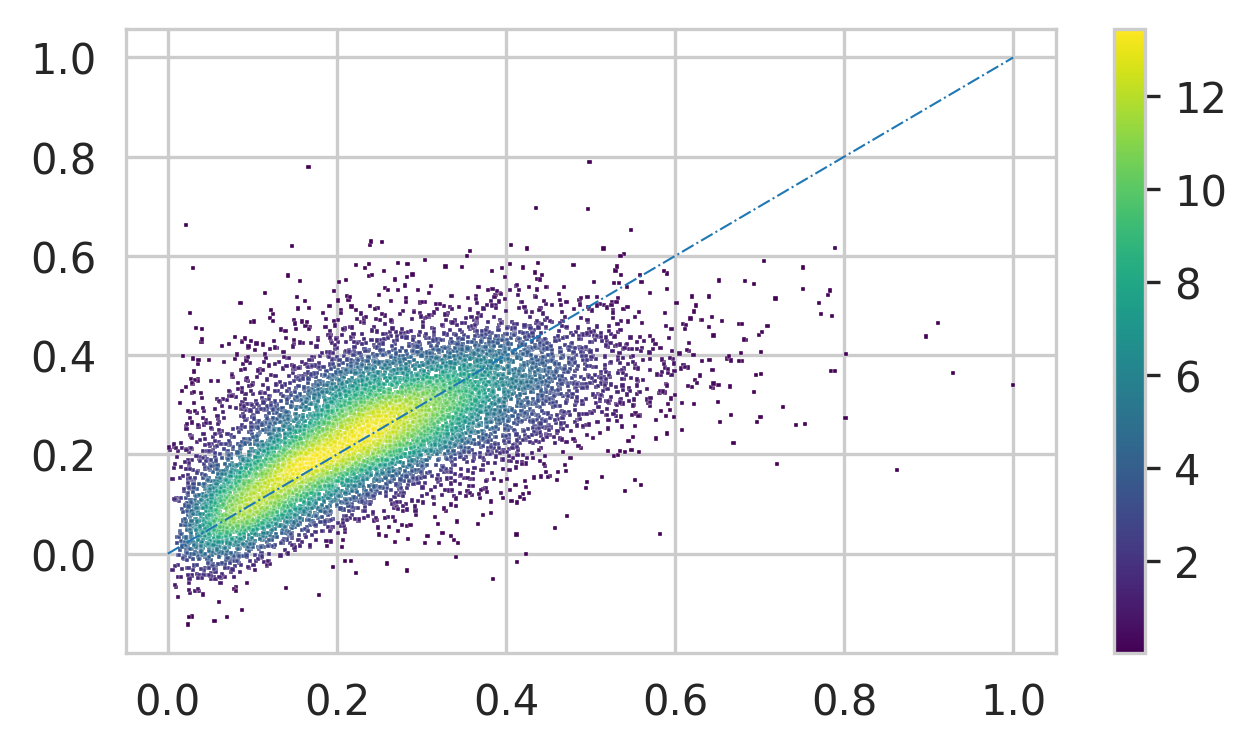

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from scipy.stats import gaussian_kde

sns.set_style("whitegrid")

random_indices = np.random.choice(pred_scores.shape[0], size=int(1e4), replace=False)
x = tanimoto_score[random_indices]
y = pred_scores[random_indices]

print(np.corrcoef(x, y)[0][1])

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

figure, ax = plt.subplots(1, 1, dpi=300, figsize=(5, 2.7))

sns.scatterplot(
    x=x,
    y=y,
    c=z,
    s=1,
    cmap="viridis",
    marker="s"
)

norm = mcolors.Normalize(max(z), min(z))
sm = ScalarMappable(norm=norm, cmap="viridis")

figure.colorbar(sm, ax=ax)

sns.lineplot(x=[0, 1], y=[0, 1], linestyle="-.", ax=ax, linewidth=0.5)
figure.savefig(SAVE_DIR / "kde.svg", transparent=True, bbox_inches="tight")
figure.savefig(SAVE_DIR / "kde.pdf", transparent=True, bbox_inches="tight")
figure.savefig(SAVE_DIR / "kde.png", transparent=True, bbox_inches="tight")